(256, 256)


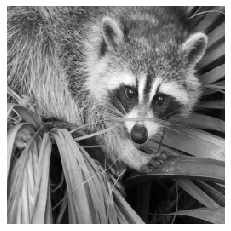

[[119. 140. 131. ... 156. 128. 123.]
 [118. 135. 108. ... 121. 111. 118.]
 [ 96. 125. 145. ... 107. 120. 118.]
 ...
 [124. 119. 130. ... 140. 141. 140.]
 [114. 123. 131. ... 141. 140. 140.]
 [114. 129. 137. ... 139. 140. 140.]]


In [15]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
from skimage import filters
from numpy import linalg as LA
 
X = mpimg.imread('X.png') 
print(X.shape)

X = X*255
plt.imshow(X) # 
plt.axis('off') # 
plt.show()


print(X)

f=0.1
a=X.size
l=len(X)
k=int(f*a)
m = np.array([0] * k + [1] * (a-k))
np.random.shuffle(m)
m=np.reshape(m, (l, l)) 


[[119. 140. 131. ... 156. 128. 123.]
 [  0. 135. 108. ... 121. 111.   0.]
 [ 96. 125. 145. ... 107. 120. 118.]
 ...
 [124. 119. 130. ... 140. 141. 140.]
 [114. 123. 131. ... 141. 140. 140.]
 [114. 129. 137. ... 139. 140. 140.]]


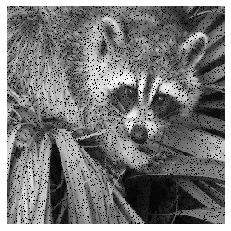

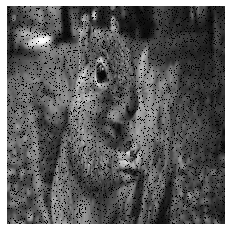

In [16]:
def RandomMask(x,f):
 
    
    a=X.size
    l=len(X)
    k=int(f*a*0.01)
    m = np.array([0] * k + [1] * (a-k))
    np.random.shuffle(m)
    m=np.reshape(m, (l, l))
    x1=m*x
    return x1,m

X1,m=RandomMask(X,10)
print(X1)
mpimg.imsave('X1.png',X1)
mpimg.imsave('m.png',m)
plt.imshow(X1) 
plt.axis('off') 
plt.show()

Y = mpimg.imread('Y.png')
Y = Y*255
Y1,mx=RandomMask(Y,10)
plt.imshow(Y1) 
plt.axis('off') 
plt.show()
    

(256, 256)

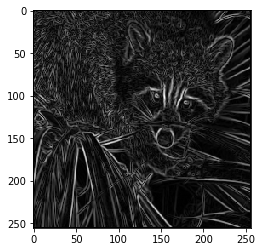

In [17]:
def ImageGrad(x):
    edges = filters.sobel(x)

    
    return edges

gx=ImageGrad(X)
plt.figure()
plt.imshow(gx)
gx.shape

In [18]:
def ReconLoss(xin,xm,m,lambd):
    a=m*xin - xm
    p=LA.norm(a, 2)
    p=p*p
    gx=ImageGrad(xin)
    q=lambd*LA.norm(gx, 1)
    l=p+q
    return l
l=ReconLoss(X,X1,m,0.1)
print(l)

695.925439453125


In [19]:
def ImageMerge(x1,x2,a):
    
    xout= a*x1 + (1-a)*x2
    return xout

def ImageMergeWithMask(x1,x2,m,a):

    xout=m*x1 + (1-m)*(a*x1 + (1-a)*x2)
    return xout
xo=ImageMergeWithMask(X,Y,m,0.5)


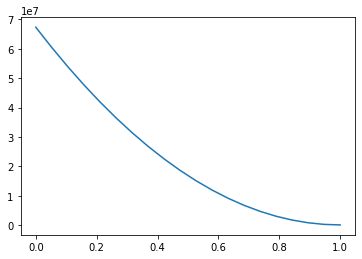

In [20]:
#6
a = np.linspace(0,1,20)
lambd=20

L=np.zeros(len(a))

for i in range(len(a)) :
    xo=ImageMerge(X,Y,a[i])
    L[i]=ReconLoss(xo,X1,m,lambd)

plt.plot(a,L)  

    
    

[0.38]


Text(0.5, 1.0, 'ground truth')

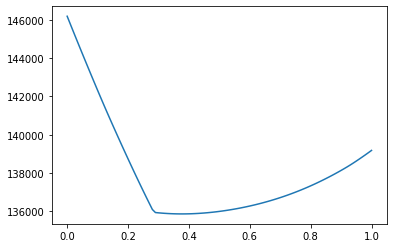

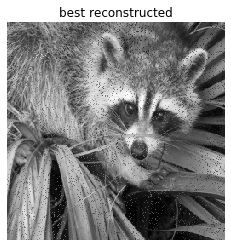

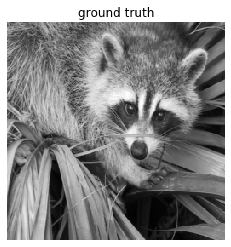

In [21]:
#7, 8
a = np.linspace(0,1,101)
lambd=20
L1=np.zeros(len(a))


for i in range(len(a)) :
    xo=ImageMergeWithMask(X,Y,m,a[i])
    L1[i]=ReconLoss(xo,X1,m,lambd)

plt.plot(a,L1)  

ind=np.where(L1== min(L1))


amin=a[ind[0]]
xo=ImageMergeWithMask(X,Y,m,amin)
print(amin)
plt.figure()
plt.gray()
plt.axis('off')
plt.imshow(xo)
plt.title('best reconstructed')

plt.figure()
plt.gray()
plt.axis('off')
plt.imshow(X)
plt.title('ground truth')

# The best reconstruction, is the 
# Image Merged With Mask at an alpha of around 0.38(Each different random generation of m will give slight differnt alpha). This image has a smaller loss function than a=1, which is the original image.
#The reason is that we use the loss function with a weight of gradient, too. So this image must have a smaller gradient than
#the original image.